In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

From the [Riddler Classic](https://fivethirtyeight.com/features/can-you-solve-these-colorful-puzzles/)...

This is a brute force approach, but it gets the job done. The whole analysis takes roughly 10 seconds on my laptop.

I'll work with the original 4 balls, then work up to 5, 6, 7, 8, and finally 9 balls (all different colors). So nColors = nBalls in each case. I won't test cases with nColors < nBalls.

There are 10,000 trials for each set. I'll draw two random values from the list without replacement and replace the value of the second draw with that of the first. Once all values are the same, move to the next trial.

The computational time gets progressively longer with each additional ball.

In [2]:
# I'm synesthetic, so all of these letters are different colors to me :)
all_balls = ['a','b','c','d','e','f','g','h','i']
data = []

for N in range(4, len(all_balls)+1):
    turns = []
    for i in range(10000): # for 10,000 trials...
        balls = all_balls[:N] # subset of all_balls
        turn = 0 # counter for number of turns
        while len(set(balls))!=1: # while all values in balls are NOT the same, loop ends when they are
            draw1 = random.choice(list(enumerate(balls)))
            draw2 = random.choice(list(enumerate(balls)))
            while draw1==draw2:
                draw2 = random.choice(list(enumerate(balls)))

            balls[draw2[0]] = draw1[1] # paint the second ball as first ball's color
            turn += 1
        turns.append(turn) # store the number of turns it took
    data.append([N,turns,np.mean(turns),np.median(turns)]) # compute and store mean number of turns for N balls
    print("Done with " + str(N) + " balls...")

Done with 4 balls...
Done with 5 balls...
Done with 6 balls...
Done with 7 balls...
Done with 8 balls...
Done with 9 balls...


I compute a mean for the "expected" number of turns, but I also compute a median for comparison.

Let's plot their distributions.

In [3]:
nBalls, raw_data, means, medians = list(map(list, zip(*data)))

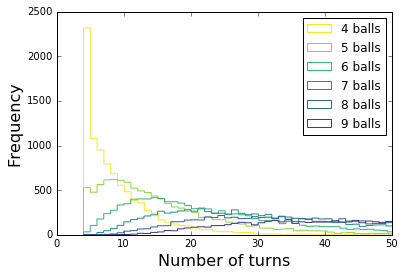

In [4]:
cmap = plt.cm.get_cmap('viridis')

for c,d in enumerate(raw_data):
    bins = np.linspace(4,max(d),max(d)-4)
    plt.hist(d, bins=bins,histtype='step', color=cmap(1.-c/len(raw_data)), label=str(4+c)+" balls")
    plt.xlim(0., 50.)
plt.legend()
plt.xlabel("Number of turns", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

And we can plot the summary statistics vs. number of balls.

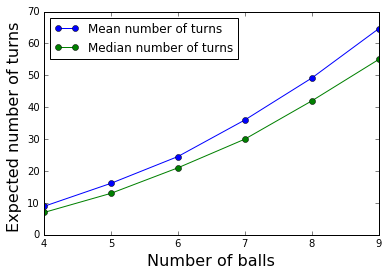

In [5]:
plt.plot(nBalls, means, '-o')
plt.plot(nBalls, medians, '-o')
plt.legend(["Mean number of turns","Median number of turns"], loc=2)
plt.xlabel("Number of balls", fontsize=16)
plt.ylabel("Expected number of turns ", fontsize=16)
plt.show()

Seems to be a "greater than linear" increase in number of turns in both cases. Median is systematically lower, probably because it's "more robust" to outliers. In any case, the expected number of turns for 4 balls is...

In [6]:
means[0]

8.9198000000000004